In [1]:
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # линейная алгебра

import matplotlib.pyplot as plt # графики, анализ данных
import seaborn as sns # также для анализа
from scipy.stats import norm
from scipy import stats

In [2]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # Scaling
import math
from sklearn.metrics import  r2_score
from sklearn.model_selection import GridSearchCV # Настройка гиперпараметров

In [3]:
# Загружаем наши данные из csv файла
houses = pd.read_csv('Data/data.csv') 

In [4]:
houses.shape

(4600, 18)

In [5]:
houses.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [6]:
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [7]:
"Средняя цена дома ${:,.0f}".format(houses.price.mean())

'Средняя цена дома $551,963'

In [8]:
houses.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [9]:
houses[houses==0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

## Замена домов с нулевой ценой

In [10]:
houses[houses["price"]==0].head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA
4362,2014-05-07 00:00:00,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA
4374,2014-05-09 00:00:00,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4376,2014-05-09 00:00:00,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA
4382,2014-05-12 00:00:00,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA
4383,2014-05-13 00:00:00,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA


In [11]:
# корреляция нулевой цены со всеми признаками
houses[houses["price"]==0].agg([min, max, 'mean', 'median'])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
min,2014-05-05 00:00:00,0.0,1.000000,1.00000,720.000000,3500.000000,1.0,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000,101-127 247th Ave SE,Auburn,WA 98001,USA
max,2014-07-08 00:00:00,0.0,6.000000,6.25000,8020.000000,188200.000000,3.0,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000,9243 NE 20th St,Woodinville,WA 98199,USA
mean,NaN,0.0,3.979592,2.69898,2787.142857,16453.306122,1.5,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286,NaN,NaN,NaN,NaN
median,NaN,0.0,4.000000,2.50000,2600.000000,9000.000000,1.5,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000,NaN,NaN,NaN,NaN


In [12]:
# дома, признаки которых похожи на признаки домов, цена которых равна 0
houses1 = houses[(houses.bedrooms == 4) & (houses.bathrooms > 1) & (houses.bathrooms < 4) & (houses.sqft_living > 2500) & 
         (houses.sqft_living < 3000) & (houses.floors < 3) & (houses.yr_built < 1970)]

In [13]:
houses1.shape

(79, 18)

In [14]:
houses1.price.mean()

735475.0370705189

In [15]:
# Заменяем дома с нулевой ценой 
houses['price'].replace(to_replace = 0, value = 735000, inplace = True)
len(houses[(houses['price'] == 0)])

0

## Замена домов с 0 спальнями

In [16]:
houses[houses["bedrooms"]==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,2014-06-12 00:00:00,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA
3209,2014-06-24 00:00:00,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,USA


In [17]:
houses_0beds_bath = houses[(houses.price > 1090000) & (houses.price < 1300000) & (houses.sqft_living > 3000) & 
         (houses.sqft_living < 4900) & (houses.floors >= 2) &(houses.floors < 4) ]

In [18]:
houses_0beds_bath.bedrooms.mean()

3.975609756097561

In [19]:
# Заменяем дома с 0 количеством спален 
houses['bedrooms'].replace(to_replace = 0, value = 4, inplace = True)
len(houses[(houses['bedrooms'] == 0)])

0

In [20]:
houses_0beds_bath.bathrooms.mean()

2.9390243902439024

In [21]:
# Заменяем дома с 0 количеством ванных комнат
houses['bathrooms'].replace(to_replace = 0, value = 3, inplace = True)
len(houses[(houses['bathrooms'] == 0)])

0

## Отношения между признаками. Выбросы

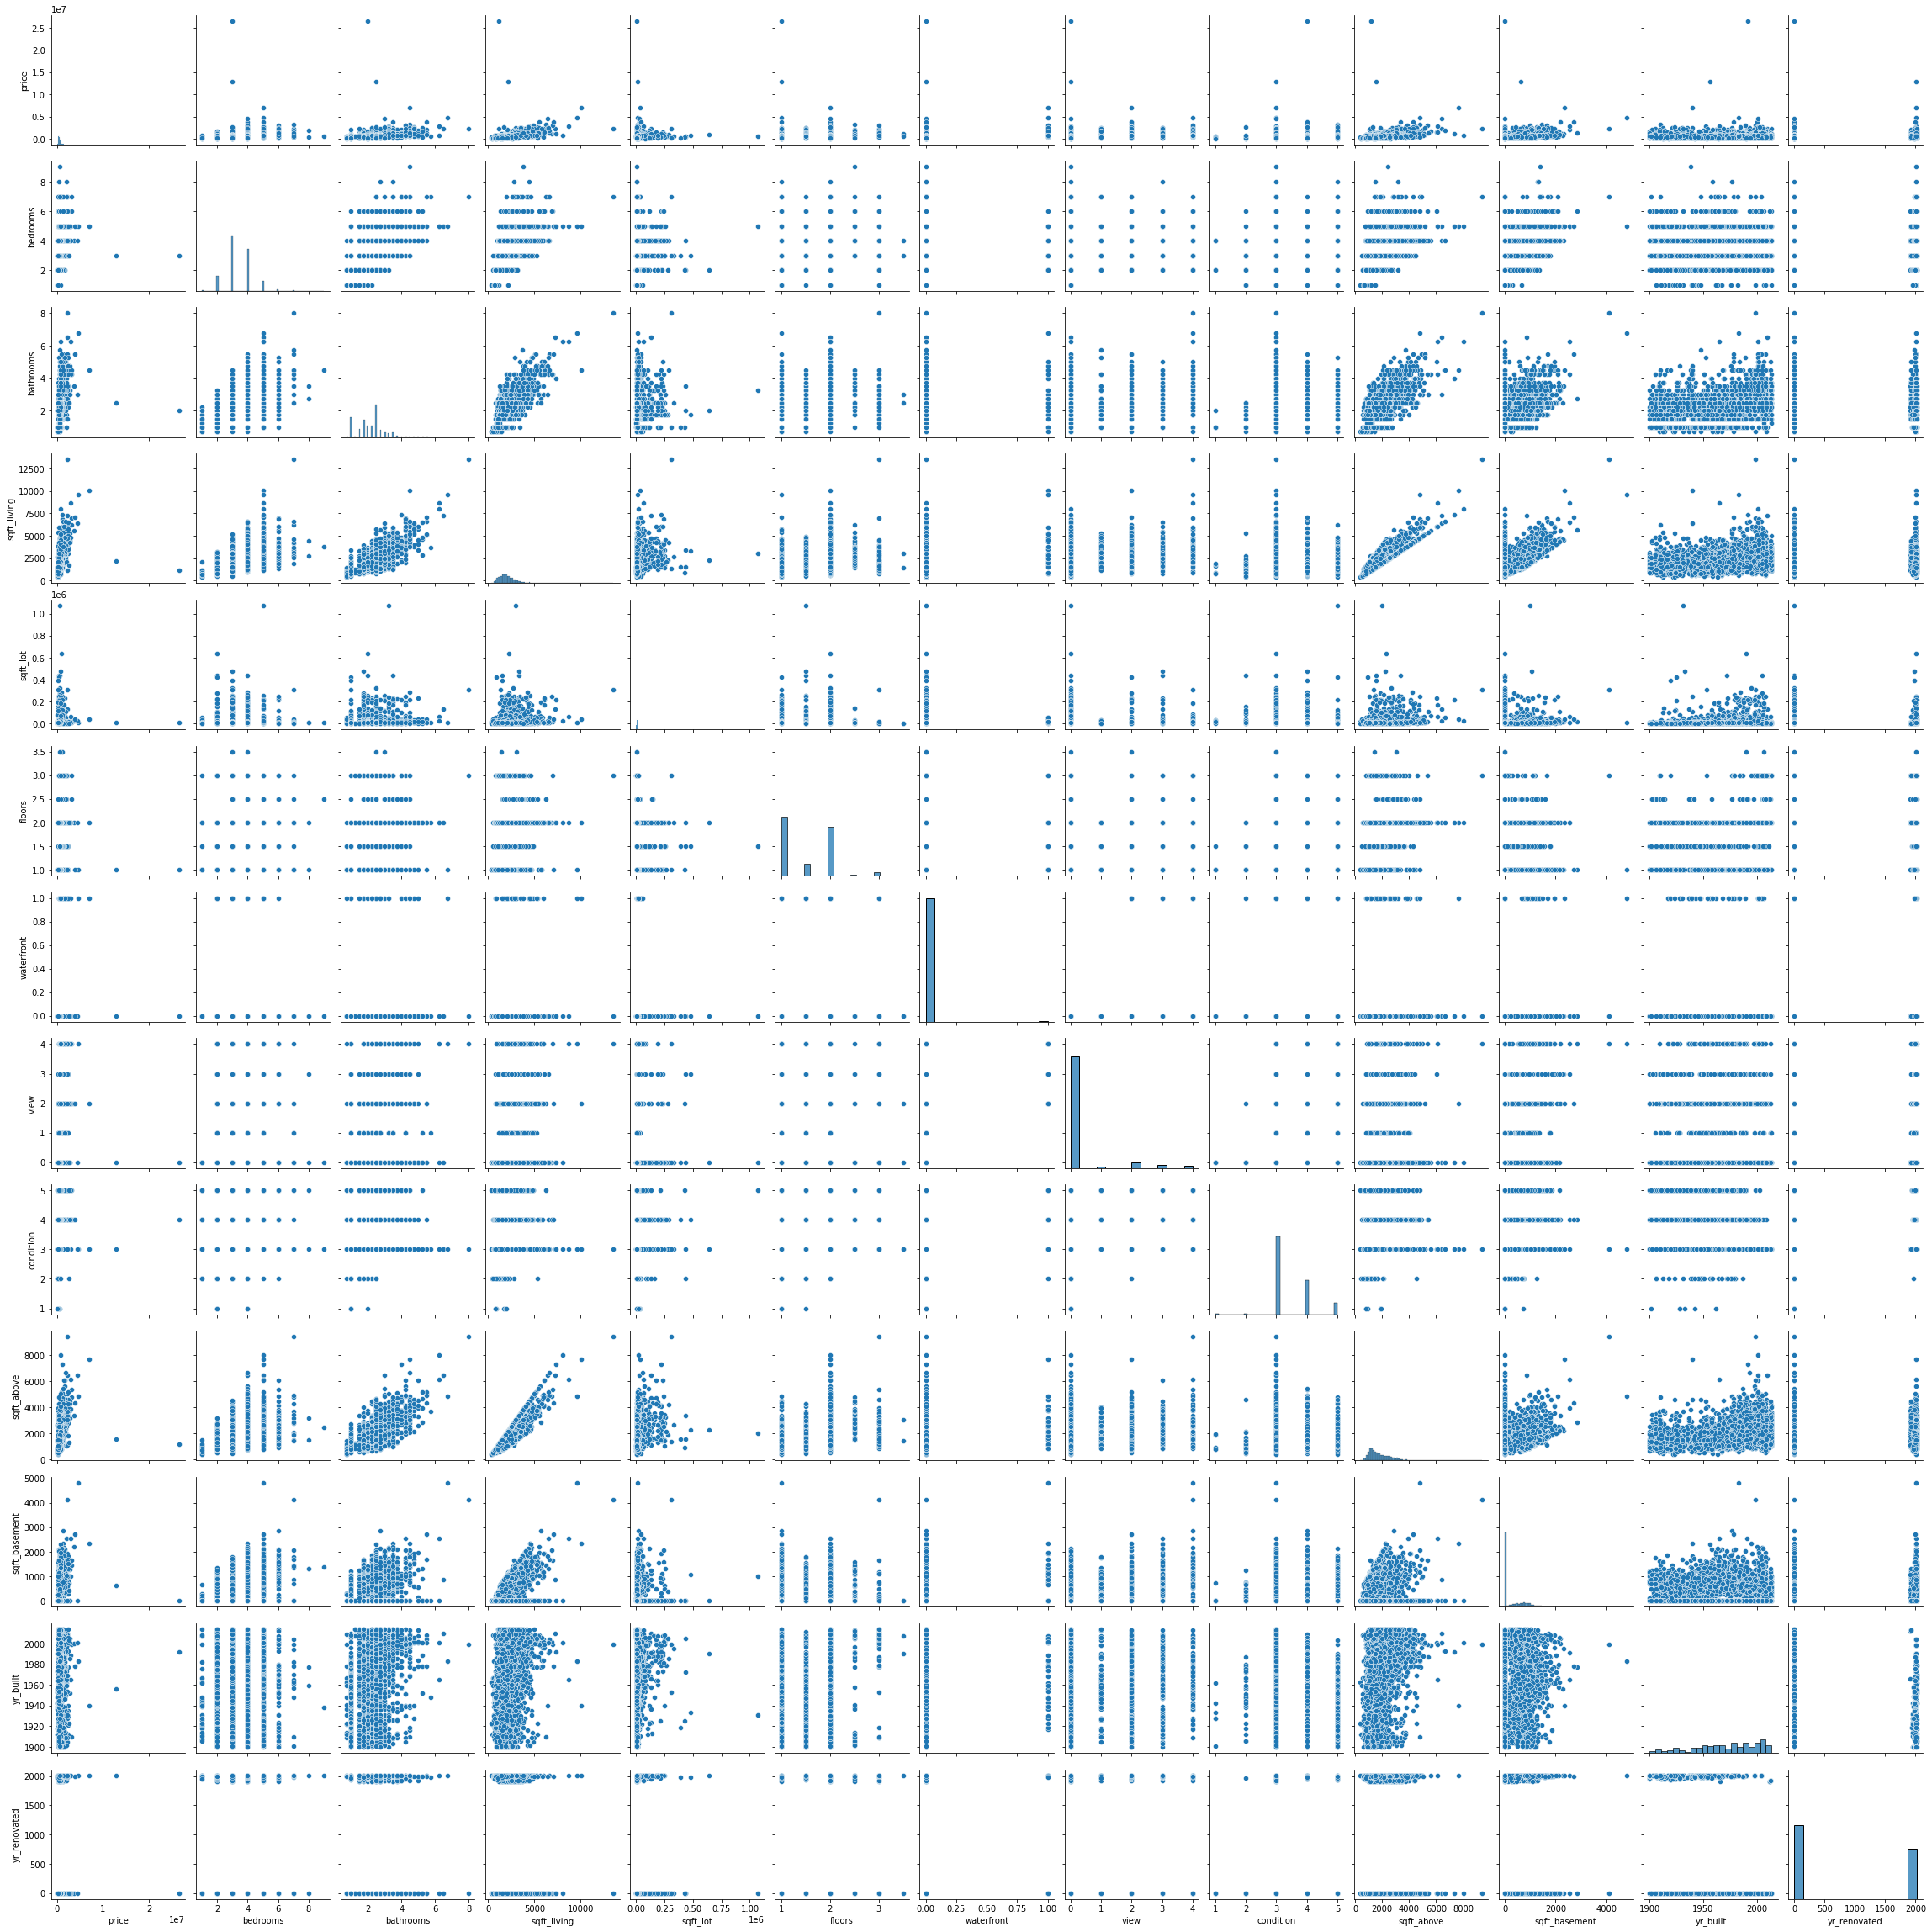

In [22]:
ax = sns.pairplot(houses)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение цены')

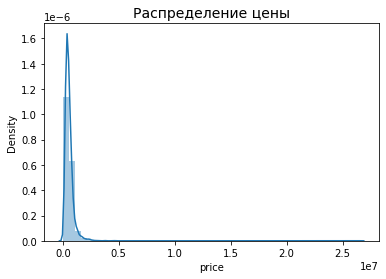

In [23]:
ax = sns.distplot(houses['price'])
ax.set_title('Распределение цены', fontsize=14)

In [24]:
# 
data = pd.read_csv('data.csv') 
houses['price'] = houses['price'].replace([data['price'][np.abs(stats.zscore(data['price'])) > 3]],np.median(houses['price']))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение цены')

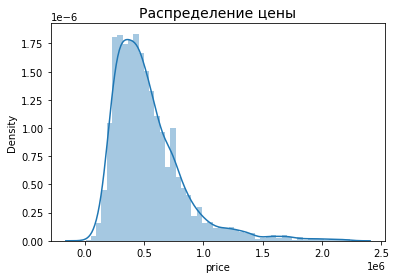

In [25]:
ax = sns.distplot(houses['price'])
ax.set_title('Распределение цены', fontsize=14)

Text(0.5, 1.0, 'Площадь VS Цена')

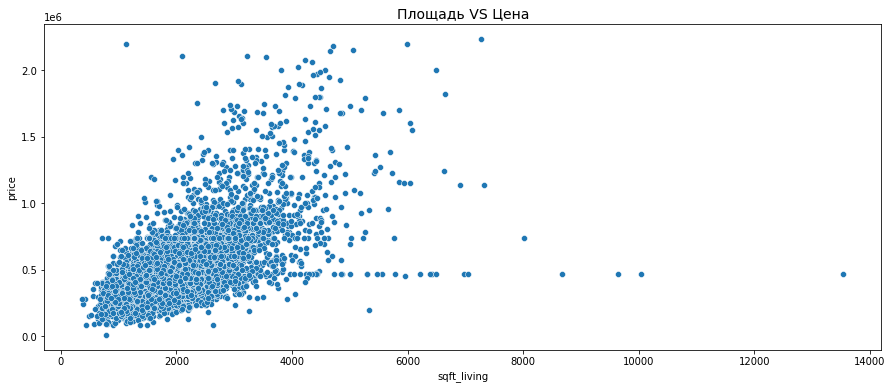

In [26]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=houses, x="sqft_living", y="price")
ax.set_title('Площадь VS Цена', fontsize=14)

In [27]:
houses['sqft_living'] = np.where((houses.sqft_living >6000 ), 6000, houses.sqft_living)

Text(0.5, 1.0, 'Площадь VS Цена')

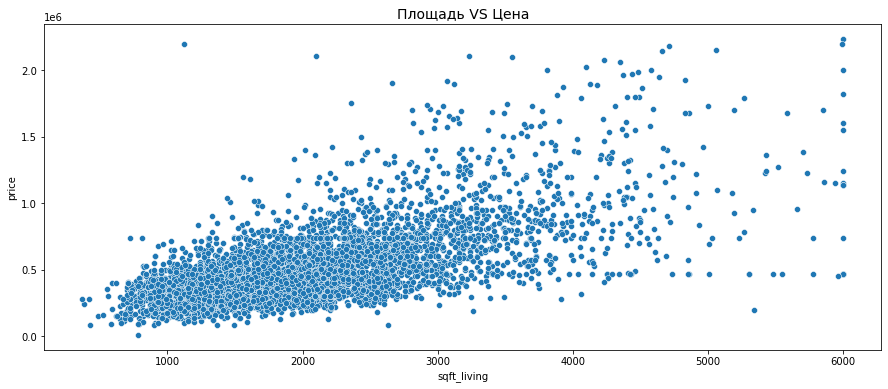

In [28]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=houses, x="sqft_living", y="price")
ax.set_title('Площадь VS Цена', fontsize=14)

Text(0.5, 1.0, 'Площадь территории VS Цена')

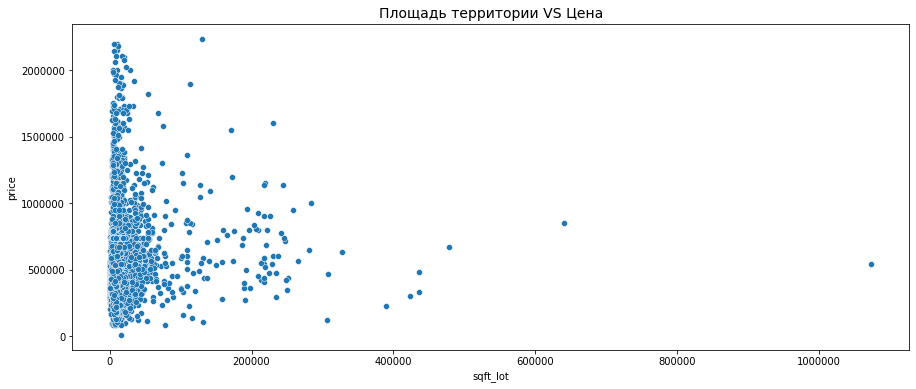

In [29]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=houses, x="sqft_lot", y="price")
ax.ticklabel_format(style='plain')
ax.set_title('Площадь территории VS Цена', fontsize=14)

Text(0.5, 1.0, 'Площадь крыши VS Цена')

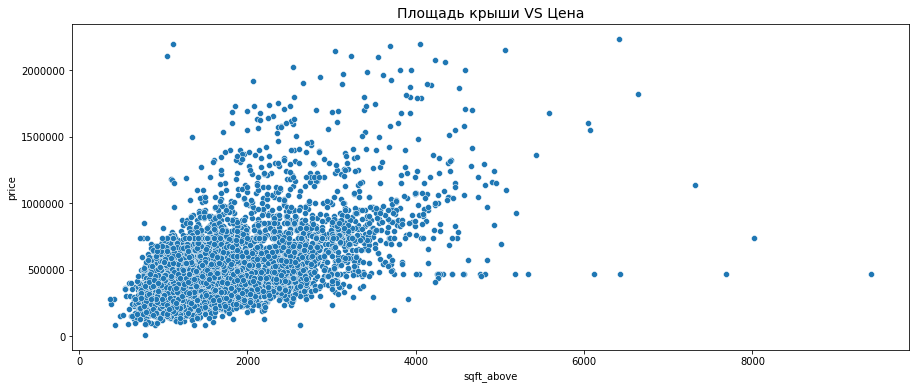

In [30]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=houses, x="sqft_above", y="price")
ax.ticklabel_format(style='plain')
ax.set_title('Площадь крыши VS Цена', fontsize=14)

In [31]:
houses['sqft_above'] = np.where((houses.sqft_above >5000 ), 5000, houses.sqft_above)

Text(0.5, 1.0, 'Площадь подвала VS Цена')

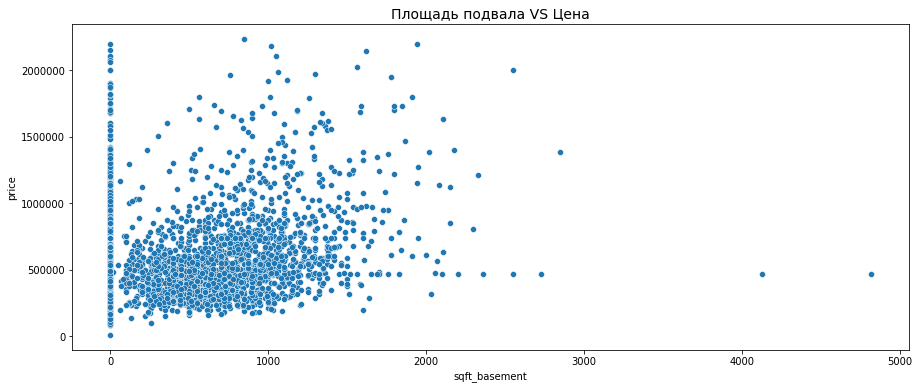

In [32]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=houses, x="sqft_basement", y="price")
ax.ticklabel_format(style='plain')
ax.set_title('Площадь подвала VS Цена', fontsize=14)

In [33]:
houses['sqft_basement'] = np.where((houses.sqft_basement >2000 ), 2000, houses.sqft_basement)

## Отношения между признаками. Коллинеарность

Text(0.5, 1.0, 'Кол-во спален VS Цена')

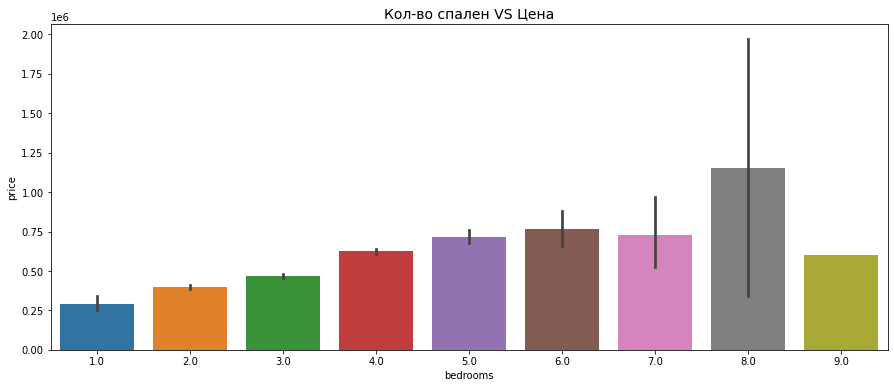

In [34]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=houses['bedrooms'], y=houses['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Кол-во спален VS Цена', fontsize=14)

In [35]:
# разбивка цен по каждой группе спален. len - кол-во домов; min,max - минимальная/максимальная цена
bedroom = houses.groupby(['bedrooms']).price.agg([len, min, max])
bedroom

,len,min,max
bedrooms,,,
1.0,38.0,80000.0,735000.0
2.0,566.0,7800.0,1695000.0
3.0,2032.0,83300.0,2147500.0
4.0,1533.0,84350.0,2199900.0
5.0,353.0,185000.0,2238888.0
6.0,61.0,175000.0,2180000.0
7.0,14.0,280000.0,1950000.0
8.0,2.0,340000.0,1970000.0
9.0,1.0,599999.0,599999.0


In [36]:
# сгруппировка домов с 7, 8, 9 спальнями с домами с 6 спальнями
houses['bedrooms'] = np.where((houses.bedrooms >6 ), 6, houses.bedrooms)

Text(0.5, 1.0, 'Кол-во ванных комнат VS Цена')

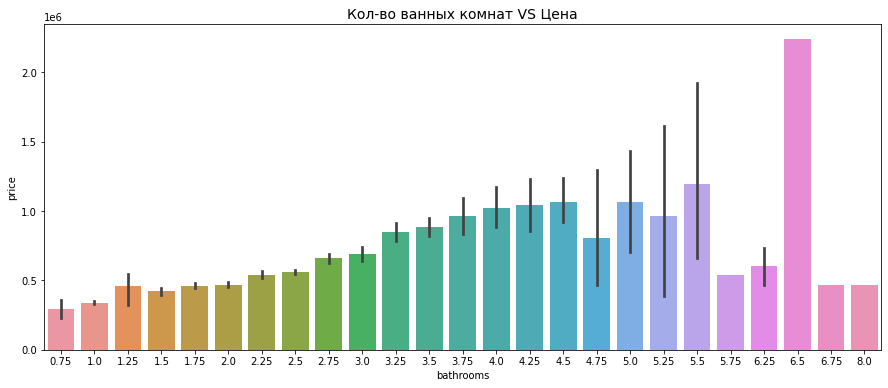

In [37]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=houses['bathrooms'], y=houses['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Кол-во ванных комнат VS Цена', fontsize=14)

In [38]:
houses[houses['bathrooms']==1.0].count()

date             743
price            743
bedrooms         743
bathrooms        743
sqft_living      743
sqft_lot         743
floors           743
waterfront       743
view             743
condition        743
sqft_above       743
sqft_basement    743
yr_built         743
yr_renovated     743
street           743
city             743
statezip         743
country          743
dtype: int64

In [39]:
houses['bathrooms'] = np.where((houses.bathrooms == 0.75), 1, houses.bathrooms)
houses['bathrooms'] = np.where((houses.bathrooms == 1.25 ), 1, houses.bathrooms)
houses['bathrooms'] = np.where((houses.bathrooms > 4.75 ), 5, houses.bathrooms)

Text(0.5, 1.0, 'Этажи VS Цена')

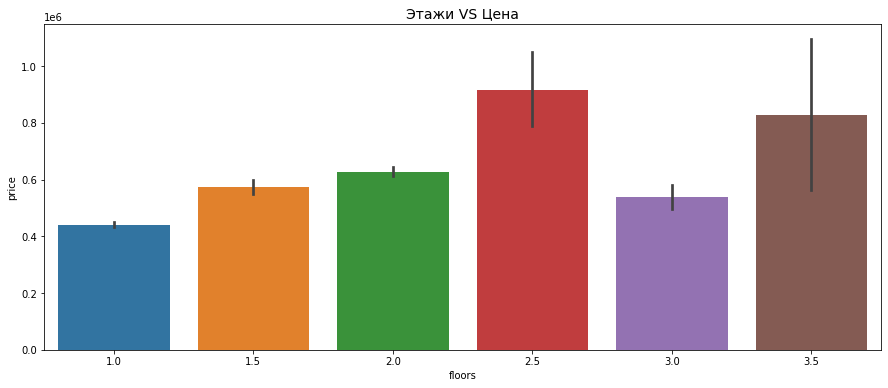

In [40]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=houses['floors'], y=houses['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Этажи VS Цена', fontsize=14)

In [41]:
floor = houses.groupby(['floors']).price.agg([len , min, max])
floor

,len,min,max
floors,,,
1.0,2174.0,7800.0,2199900.0
1.5,444.0,132500.0,2027000.0
2.0,1811.0,84350.0,2238888.0
2.5,41.0,195000.0,1990000.0
3.0,128.0,288790.0,2000000.0
3.5,2.0,563500.0,1095000.0


In [42]:
houses['floors'] = np.where((houses.floors == 3.5 ), 3, houses.floors)

Text(0.5, 1.0, 'Набережная VS Цена')

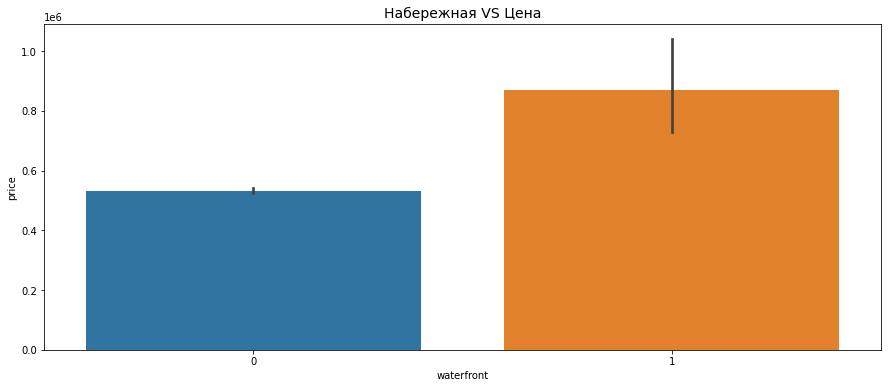

In [43]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=houses['waterfront'], y=houses['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Набережная VS Цена', fontsize=14)

In [44]:
waterfront = houses.groupby(['waterfront']).price.agg([len , min, max])
waterfront

,len,min,max
waterfront,,,
0,4567.0,7800.0,2238888.0
1,33.0,385000.0,2200000.0


Text(0.5, 1.0, 'Вид VS Цена')

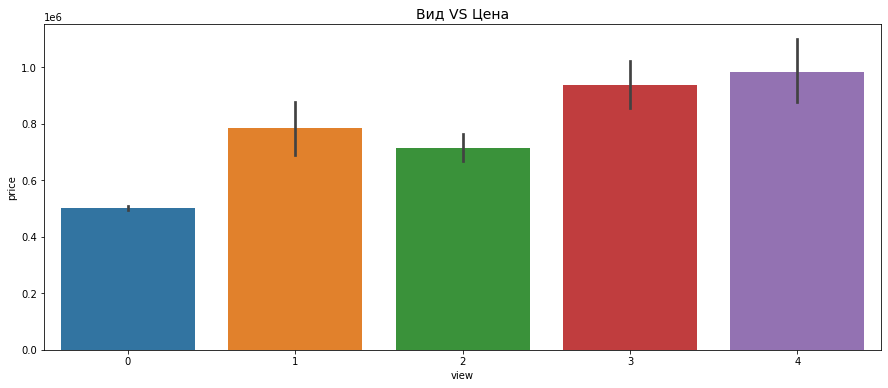

In [45]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=houses['view'], y=houses['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Вид VS Цена', fontsize=14)

In [46]:
view = houses.groupby(['view']).price.agg([len , min, max])
view

,len,min,max
view,,,
0,4140.0,7800.000000,2238888.0
1,69.0,180785.714286,1965221.0
2,205.0,175000.000000,1925000.0
3,116.0,107500.000000,2180000.0
4,70.0,361000.000000,2200000.0


Text(0.5, 1.0, 'Состояние VS Цена')

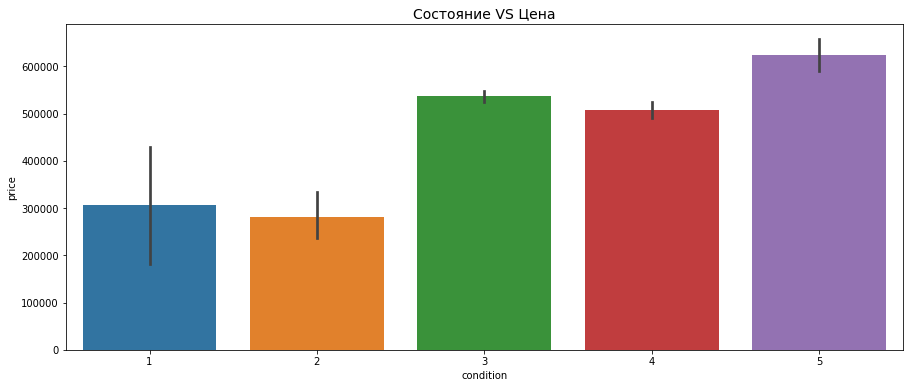

In [47]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=houses['condition'], y=houses['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Состояние VS Цена', fontsize=14)

In [48]:
condition = houses.groupby(['condition']).price.agg([len , min, max])
condition

,len,min,max
condition,,,
1,6.0,7800.0,550000.0
2,32.0,80000.0,735000.0
3,2875.0,83000.0,2238888.0
4,1252.0,83300.0,2110000.0
5,435.0,83300.0,2147500.0


In [49]:
houses['condition'] = np.where((houses.condition == 1 ), 2, houses.condition)

In [50]:
# вычеркиваем некоторые признаки из анализа
houses.drop(["date",'yr_built','yr_renovated','sqft_lot'], axis=1, inplace = True)

Text(0.5, 1.0, 'Корреляционная матрица')

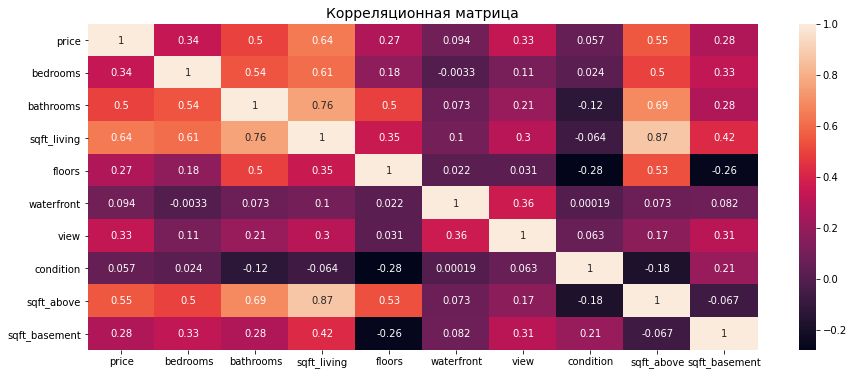

In [51]:
plt.figure(figsize=(15,6))
ax = sns.heatmap(houses.corr(),annot = True)
ax.set_title('Корреляционная матрица', fontsize=14)

In [52]:
houses.drop(['waterfront','condition','sqft_above'],axis=1, inplace=True)

In [53]:
houses.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
floors           float64
view               int64
sqft_basement      int64
street            object
city              object
statezip          object
country           object
dtype: object

In [54]:
houses.country.value_counts()

USA    4600
Name: country, dtype: int64

In [55]:
houses['street'].nunique()

4525

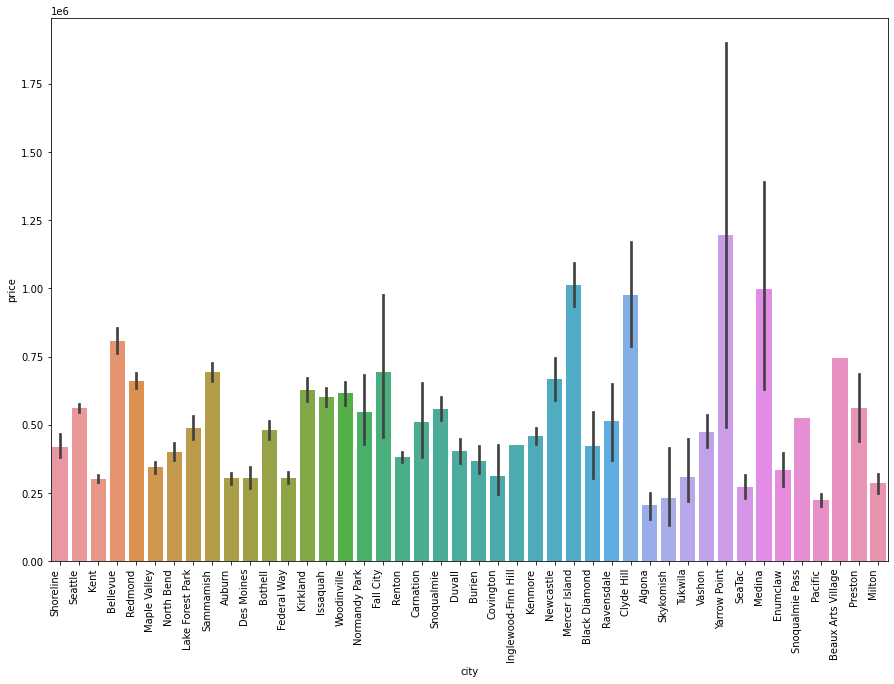

In [56]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="city", y="price", data=houses)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");


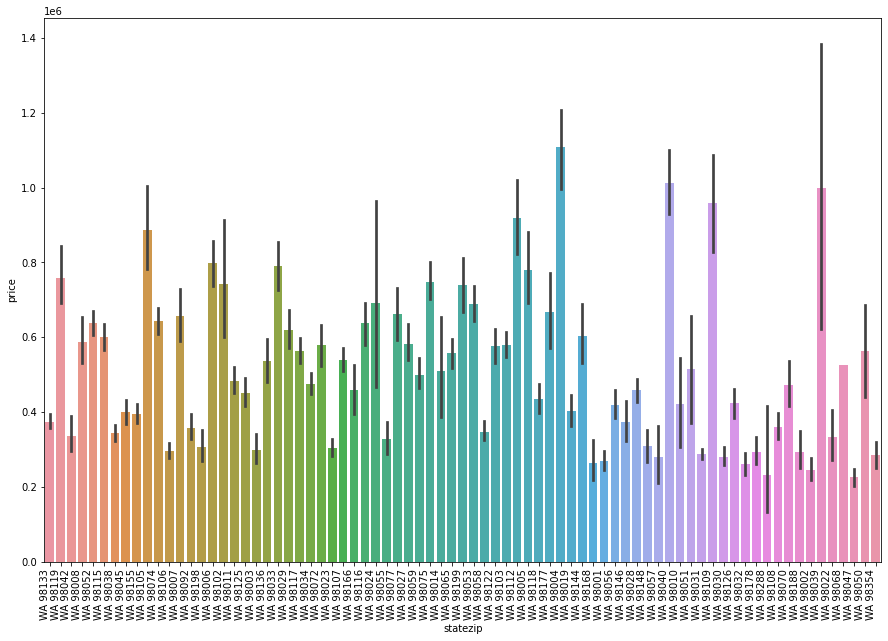

In [57]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="statezip", y="price", data=houses)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

In [58]:
houses.drop(['street','city','country'],axis=1, inplace=True)

## ZIPCODE encoding

In [59]:
houses.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_basement,statezip
0,313000.0,3.0,1.50,1340,1.5,0,0,WA 98133
1,468750.0,5.0,2.50,3650,2.0,4,280,WA 98119
2,342000.0,3.0,2.00,1930,1.0,0,0,WA 98042
3,420000.0,3.0,2.25,2000,1.0,0,1000,WA 98008
4,550000.0,4.0,2.50,1940,1.0,0,800,WA 98052


In [60]:
houses = pd.get_dummies(houses, columns=['statezip'], prefix = ['statezip'])

houses.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_basement,statezip_WA 98001,statezip_WA 98002,statezip_WA 98003,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,3.0,1.50,1340,1.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,468750.0,5.0,2.50,3650,2.0,4,280,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,1.0,0,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,1.0,0,800,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
houses.shape

(4600, 84)

In [62]:
X1 = houses.drop(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'sqft_basement'],axis = 1)
y = houses["price"]

In [63]:
import scipy.stats as stats
for i in X1.columns:
    print(stats.f_oneway(X1[i],y))


F_onewayResult(statistic=14605.260767164393, pvalue=0.0)
F_onewayResult(statistic=14605.261135362472, pvalue=0.0)
F_onewayResult(statistic=14605.260992834186, pvalue=0.0)
F_onewayResult(statistic=14605.260684022885, pvalue=0.0)
F_onewayResult(statistic=14605.261218503998, pvalue=0.0)
F_onewayResult(statistic=14605.260256438021, pvalue=0.0)
F_onewayResult(statistic=14605.261099730416, pvalue=0.0)
F_onewayResult(statistic=14605.260969079478, pvalue=0.0)
F_onewayResult(statistic=14605.261456051168, pvalue=0.0)
F_onewayResult(statistic=14605.261182871922, pvalue=0.0)
F_onewayResult(statistic=14605.261301645505, pvalue=0.0)
F_onewayResult(statistic=14605.26106409833, pvalue=0.0)
F_onewayResult(statistic=14605.261230381362, pvalue=0.0)
F_onewayResult(statistic=14605.260434598382, pvalue=0.0)
F_onewayResult(statistic=14605.261432296464, pvalue=0.0)
F_onewayResult(statistic=14605.260434598382, pvalue=0.0)
F_onewayResult(statistic=14605.260767164398, pvalue=0.0)
F_onewayResult(statistic=14605.2

# SCALING


In [64]:
houses['log_price'] = np.log(houses['price'])
houses = houses.drop(["price"],axis = 1)
houses.head()

,bedrooms,bathrooms,sqft_living,floors,view,sqft_basement,statezip_WA 98001,statezip_WA 98002,statezip_WA 98003,statezip_WA 98004,...,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,log_price
0,3.0,1.50,1340,1.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.653958
1,5.0,2.50,3650,2.0,4,280,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13.057825
2,3.0,2.00,1930,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.742566
3,3.0,2.25,2000,1.0,0,1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.948010
4,4.0,2.50,1940,1.0,0,800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13.217674


In [65]:
# WITH THE LOG OF THE PRICE -> THE RESULT IS BETTER
X = houses.drop(["log_price"],axis = 1)
y = houses["log_price"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [67]:
y_train

2095    12.571930
1173    12.675920
1954    12.254863
256     13.151922
3341    12.411867
          ...    
4426    12.551465
466     13.681979
3092    12.577636
3772    13.304685
860     13.071070
Name: log_price, Length: 3450, dtype: float64

Features scaling

In [68]:
## Here the best is Standard
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, QuantileTransformer
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)


## KNN

Choosin k

In [69]:
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14], 'weights': ['uniform','distance']}]

knn = KNeighborsRegressor()

# Search for best hyperparameters
grid = GridSearchCV(estimator=knn, param_grid=hp_candidates, cv=5, scoring='r2')
grid.fit(X_train, y_train)
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.6874623676402238
KNeighborsRegressor(n_neighbors=7, weights='distance')
{'n_neighbors': 7, 'weights': 'distance'}


Training

In [70]:
knn = KNeighborsRegressor(n_neighbors=7, weights='distance')
# fit the model using the training data and training targets
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7, weights='distance')

In [71]:
knn.score(X_test, y_test)

0.696645261427254

# SVR

In [72]:
svr = SVR(kernel='rbf',  C=1e0, gamma=0.01)
svr.fit(X_train, y_train)


SVR(gamma=0.01)

In [73]:
grid_sv = GridSearchCV(svr, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='r2')
grid_sv.fit(X_train, y_train)
print("Best classifier :", grid_sv.best_estimator_)

Best classifier : SVR(gamma=0.01)


In [75]:
print(grid_sv.best_score_)
print(grid_sv.best_estimator_)
print(grid_sv.best_params_)

0.7401027458422847
SVR(gamma=0.01)
{'C': 1.0, 'gamma': 0.01}


In [72]:
svr = SVR(kernel='rbf',  C=1e0, gamma=0.01)
svr.fit(X_train, y_train)


SVR(gamma=0.01)

In [74]:
svr.score(X_test, y_test)

0.7263638160971133

# HYBRID

In [76]:
knn_pred = knn.predict(X_test)

In [77]:
svr_pred = svr.predict(X_test)

In [78]:
combine_pred = knn_pred*0.4 + svr_pred*0.6

In [79]:
r2_score(y_test, combine_pred)

0.7366808913011857